In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
f = pd.read_csv("train.csv")
f.head(2)

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1.0,2.0,1.0,1.0,2.0,2.0,3884.805998,40026.0,1.0,0.0
1,13005143,4,1,3,1,2,1,1,1,99,...,2.0,2.0,2.0,3.0,2.0,2.0,1627.108106,40015.0,2.0,1.0


In [6]:
f.shape

(39999, 72)

In [7]:
f.isnull().sum()

PERID       0
IFATHER     0
NRCH17_2    0
IRHHSIZ2    0
IIHHSIZ2    0
           ..
AIIND102    1
ANALWT_C    1
VESTR       1
VEREP       1
Criminal    1
Length: 72, dtype: int64

In [8]:
# f = f.drop(columns = ['Unnamed: 32','id'],  axis =1 )

In [9]:
f = f.dropna()

In [10]:
f.duplicated().sum()

0

# Data Pre processing and Cleaning

In [11]:
# from sklearn import preprocessing
  
# label_encoder = preprocessing.LabelEncoder()

# f['diagnosis']= label_encoder.fit_transform(f['diagnosis'])
  
# f['diagnosis'].unique()

In [12]:
from scipy import stats

z = np.abs(stats.zscore(f.drop('Criminal', axis =  1)))
print(z)

          PERID   IFATHER  NRCH17_2  IRHHSIZ2  IIHHSIZ2  IRKI17_2  IIKI17_2  \
0      1.148726  0.547783  1.713723  0.403054  0.030056  0.833519  0.061564   
1      1.621868  0.547783  0.588661  0.297387  0.030056  0.074581  0.061564   
2      0.507464  0.547783  0.588661  0.997827  0.030056  0.074581  0.061564   
3      0.644828  0.547783  0.536400  0.997827  0.030056  0.982682  0.061564   
4      0.813499  2.002685  0.536400  1.803935  0.030056  1.741620  0.061564   
...         ...       ...       ...       ...       ...       ...       ...   
39993  0.347381  0.547783  0.536400  0.297387  0.030056  0.982682  0.061564   
39994  1.361759  0.547783  0.536400  1.698268  0.030056  0.982682  0.061564   
39995  0.915895  0.547783  0.536400  0.403054  0.030056  0.982682  0.061564   
39996  1.308144  0.547783  2.838784  1.803935  0.030056  1.741620  0.061564   
39997  1.540880  2.002685  0.536400  0.403054  0.030056  0.074581  0.061564   

       IRHH65_2  IIHH65_2  PRXRETRY  ...  POVERTY3 

In [13]:
threshold = 3
print(np.where(z>3))

(array([    4,     4,     4, ..., 39995, 39996, 39996]), array([52, 54, 55, ..., 59, 66, 67]))


In [14]:
f = f[(z<3).all(axis=1)]

In [15]:
f.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1.0,2.0,1.0,1.0,2.0,2.0,3884.805998,40026.0,1.0,0.0
1,13005143,4,1,3,1,2,1,1,1,99,...,2.0,2.0,2.0,3.0,2.0,2.0,1627.108106,40015.0,2.0,1.0
2,67415143,4,1,2,1,2,1,1,1,99,...,2.0,2.0,2.0,3.0,2.0,2.0,4344.957980,40024.0,1.0,0.0
3,70925143,4,0,2,1,1,1,1,1,99,...,2.0,2.0,1.0,1.0,2.0,2.0,792.521931,40027.0,1.0,0.0
13,85326143,1,0,3,1,2,1,1,1,99,...,2.0,2.0,1.0,1.0,2.0,2.0,2671.376188,40035.0,2.0,0.0


In [16]:
f.Criminal.value_counts()

0.0    20232
1.0     1312
Name: Criminal, dtype: int64

0.0    20232
1.0     1312
Name: Criminal, dtype: int64


<AxesSubplot:ylabel='Target Variable'>

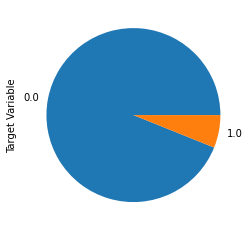

In [17]:
print(f["Criminal"].value_counts())

f.groupby('Criminal').size().plot(kind='pie', y = "Criminal",label = "Target Variable")

# Handeling imbalance Data Set
## Down sampling
- take random values of Benign data equal to malignant length.
- Not a good approach you are throwing away a lot of data and information

In [18]:
benign = f[f["Criminal"] == 0]  
malignant  = f[f["Criminal"] == 1]
print(benign.shape)
print(malignant.shape)

(20232, 72)
(1312, 72)


In [19]:
from sklearn.utils import resample
down_sample = resample(benign,
             replace=True,
             n_samples=len(malignant),
             random_state=42)

print(down_sample.shape)

(1312, 72)


In [20]:
down_sampled = pd.concat([malignant, down_sample])

1.0    1312
0.0    1312
Name: Criminal, dtype: int64


<AxesSubplot:ylabel='Type'>

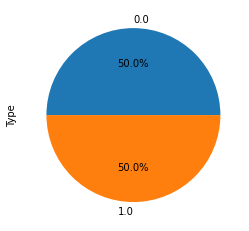

In [22]:

print(down_sampled["Criminal"].value_counts())

down_sampled.groupby('Criminal').size().plot(kind='pie',
                                       y = "Criminal",
                                       label = "Type",
                                       autopct='%1.1f%%')


## Upsampling
- Create new sample from the current samples, by simply duplicating

In [23]:
from sklearn.utils import resample
up_sampled = resample(malignant,
             replace=True,
             n_samples=len(benign),
             random_state=42)

print(up_sampled.shape)

(20232, 72)


0.0    20232
1.0    20232
Name: Criminal, dtype: int64


<AxesSubplot:ylabel='Type'>

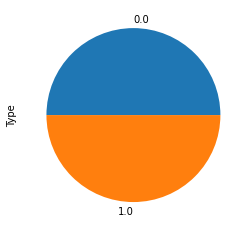

In [25]:
data_upsampled = pd.concat([benign, up_sampled])

print(data_upsampled["Criminal"].value_counts())

data_upsampled.groupby('Criminal').size().plot(kind='pie',
                                       y = "Criminal",
                                       label = "Type")

## SMOTE (Synthetic Minority Oversampling Technique)
- adds more data point in the undersamples feature with the same line and pattern as it was before
- Use KNN models and create synthetic over samples such as creating from the patterns and nearest ones

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
x_1 = f.drop('Criminal', axis =1 )
y_1 = f['Criminal']

In [28]:
Over_sample = SMOTE()
x3,y3 = Over_sample.fit_resample(x_1,y_1)

In [29]:
print(y3.value_counts())

0.0    20232
1.0    20232
Name: Criminal, dtype: int64


In [23]:
# sns.pairplot(f)

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
PERID,1.000000,0.003804,-0.004505,0.001037,NaN,-0.006545,NaN,-0.000221,NaN,-0.009248,...,-0.000651,0.006773,0.001118,-0.000864,NaN,NaN,-0.002338,-0.001560,0.004570,0.000663
IFATHER,0.003804,1.000000,0.359561,-0.337587,NaN,-0.461970,NaN,0.031656,NaN,-0.006002,...,-0.032818,0.018368,-0.019288,-0.017701,NaN,NaN,0.326982,-0.003468,-0.007000,-0.069894
NRCH17_2,-0.004505,0.359561,1.000000,0.356467,NaN,0.498861,NaN,-0.042720,NaN,0.011204,...,-0.006356,-0.006709,0.031008,0.033464,NaN,NaN,0.129732,-0.001945,-0.003469,-0.080937
IRHHSIZ2,0.001037,-0.337587,0.356467,1.000000,NaN,0.776317,NaN,0.032141,NaN,-0.009976,...,0.022995,-0.004986,-0.006927,-0.004856,NaN,NaN,-0.118170,0.003069,-0.001762,-0.020866
IIHHSIZ2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


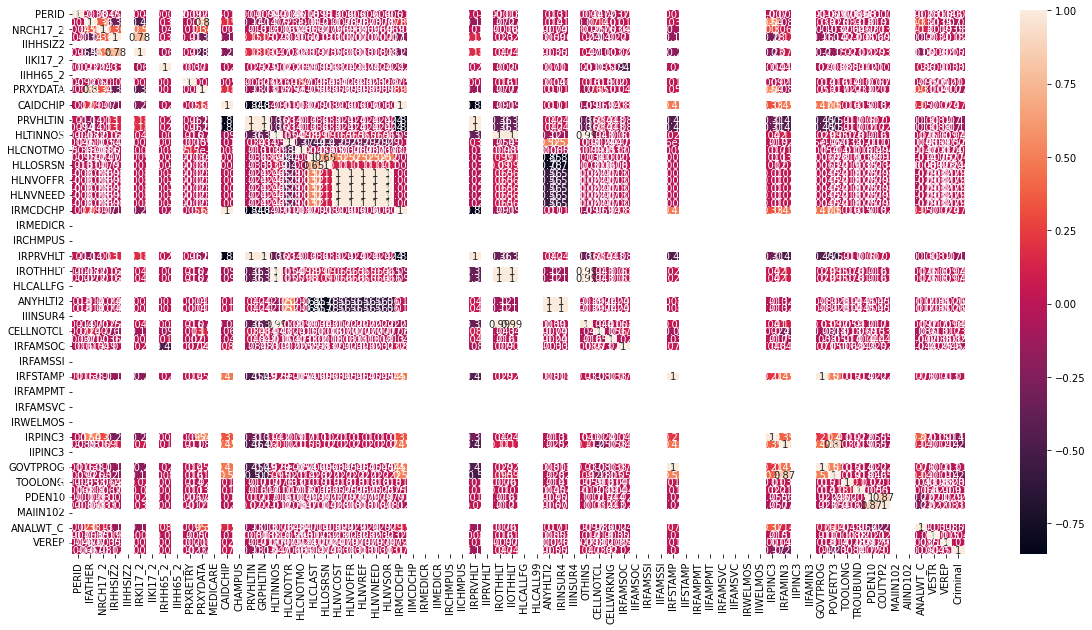

In [30]:
plt.figure(figsize=(20,10))
c= f.corr()
sns.heatmap(c,annot=True)
c.head()

# Feature Selection Technique

- Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result.

- The Extra Trees algorithm works by creating a large number of unpruned decision trees from the training dataset. Predictions are made by averaging the prediction of the decision trees in the case of regression or using majority voting in the case of classification.


- The impurity-based feature importances.

- The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

- Warning: impurity-based feature importances can be misleading for high cardinality features (many unique values). See sklearn.inspection.permutation_importance as an alternative.


- It is sometimes called “gini importance” or “mean decrease impurity” and is defined as the total decrease in node impurity (weighted by the probability of reaching that node (which is approximated by the proportion of samples reaching that node)) averaged over all trees of the ensemble.

In [31]:
x = down_sampled.drop('Criminal', axis = 1)
y= down_sampled['Criminal']

In [32]:
X1 = data_upsampled.drop('Criminal', axis = 1)
y1 = data_upsampled['Criminal']

## For down sample

[4.26277373e-02 2.14072448e-02 1.33804416e-02 3.30652606e-02
 0.00000000e+00 1.74836819e-02 0.00000000e+00 4.76999350e-03
 0.00000000e+00 6.34231983e-05 1.60102212e-02 0.00000000e+00
 1.54118473e-02 0.00000000e+00 5.39975544e-02 4.78068369e-02
 2.23813036e-03 1.37027412e-04 1.27890678e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.13249411e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.71028394e-02 0.00000000e+00 2.29534627e-03 1.95986278e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21210772e-03 1.39687931e-02 2.39934095e-03
 1.00501606e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.67532043e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.48572352e-02 2.53375901e-01 0.00000000e+00 0.00000000e+00
 6.55033509e-03 1.33627472e-01 6.33557353e-03 5.64624105e-03
 1.43933701e-02 1.813355

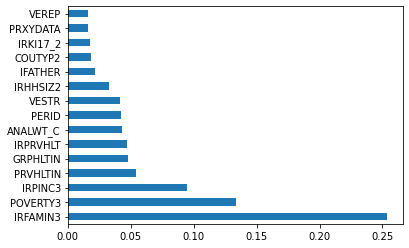

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## For upsample

[4.19951296e-02 2.34804694e-02 1.30000490e-02 3.40941927e-02
 0.00000000e+00 1.62631603e-02 0.00000000e+00 4.26676263e-03
 0.00000000e+00 7.11227657e-05 1.57596791e-02 0.00000000e+00
 1.13619128e-02 0.00000000e+00 3.60980875e-02 5.45826771e-02
 3.22791204e-03 2.17350371e-04 2.15794562e-04 7.37158056e-06
 8.98534004e-07 4.50335529e-07 1.59466373e-06 7.11755160e-07
 1.61714075e-06 1.56293384e-06 1.28428072e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.30780794e-02 0.00000000e+00 1.71643645e-03 1.87267059e-03
 0.00000000e+00 0.00000000e+00 1.27197015e-05 1.01587824e-05
 0.00000000e+00 1.46380199e-03 1.35599637e-02 2.46516438e-03
 8.38438314e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.23859858e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.89134223e-02 2.48405469e-01 0.00000000e+00 0.00000000e+00
 6.68320553e-03 1.61134997e-01 5.87277314e-03 5.25055762e-03
 1.37095636e-02 1.663668

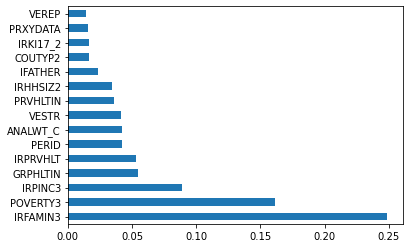

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X1,y1)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances1 = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances1.nlargest(15).plot(kind='barh')
plt.show()

## For SMOTE

[1.88174412e-02 5.97936207e-02 1.90368372e-02 2.19749762e-02
 0.00000000e+00 1.40170821e-02 0.00000000e+00 4.04970184e-03
 0.00000000e+00 1.07889038e-04 3.84183463e-02 0.00000000e+00
 1.20257514e-02 0.00000000e+00 5.08255701e-02 3.65029427e-02
 1.54324304e-03 1.99515503e-04 1.85924549e-04 6.39836734e-06
 5.07432305e-06 0.00000000e+00 2.98438075e-07 1.12704160e-08
 0.00000000e+00 5.74906952e-07 1.87259353e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.07881331e-02 0.00000000e+00 1.25250065e-03 2.01071440e-03
 0.00000000e+00 0.00000000e+00 8.08001935e-06 2.47771035e-06
 0.00000000e+00 9.52163876e-04 2.64626832e-02 1.95532817e-03
 8.11588327e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.41338709e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.11402876e-02 2.20117318e-01 0.00000000e+00 0.00000000e+00
 1.33915069e-02 1.73007356e-01 5.40633309e-03 4.22470318e-03
 1.71739277e-02 2.172398

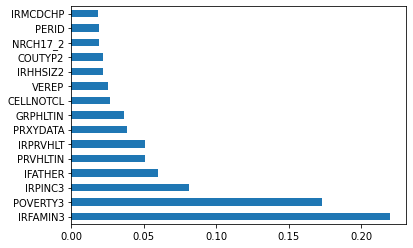

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x3,y3)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances2 = pd.Series(model.feature_importances_, index=x3.columns)
feat_importances2.nlargest(15).plot(kind='barh')
plt.show()

In [36]:
X_selected_downsample = feat_importances.nlargest(15)
X_selected_upsample   = feat_importances1.nlargest(15)
X_selected_smote = feat_importances2.nlargest(15)

In [37]:
X_selected_downsample

IRFAMIN3    0.253376
POVERTY3    0.133627
IRPINC3     0.094857
PRVHLTIN    0.053998
GRPHLTIN    0.047807
IRPRVHLT    0.047103
ANALWT_C    0.042924
PERID       0.042628
VESTR       0.041744
IRHHSIZ2    0.033065
IFATHER     0.021407
COUTYP2     0.018134
IRKI17_2    0.017484
PRXYDATA    0.016010
VEREP       0.015896
dtype: float64

# Spliting Data Set

In [31]:
X3 = x3[['concave points_mean','concave points_worst', 'radius_worst', 'perimeter_worst' , 'area_worst', 'radius_mean', 'concavity_mean', 'area_mean', 'perimeter_mean','concavity_worst', 'compactness_worst', 'area_se', 'texture_worst','radius_se','perimeter_se' ]]
Y3 = y3

In [32]:
X1 = down_sampled[['concave points_mean','concave points_worst', 'radius_worst', 'perimeter_worst' , 'area_worst', 'radius_mean', 'concavity_mean', 'area_mean', 'perimeter_mean','concavity_worst', 'compactness_worst', 'area_se', 'perimeter_se', 'compactness_mean','texture_worst' ]]
Y1 = down_sampled['diagnosis']

In [33]:
X2 = data_upsampled[['concave points_mean','concave points_worst', 'radius_worst', 'perimeter_worst' , 'area_worst', 'radius_mean', 'concavity_mean', 'area_mean', 'perimeter_mean','concavity_worst', 'compactness_worst', 'perimeter_se', 'area_se','texture_worst', 'radius_se']]
Y2 = data_upsampled['diagnosis']

# Scalling of Data set 

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X1))
X_scaled1 = scaler.transform(X1)

StandardScaler()


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X2))
X_scaled2 = scaler.transform(X2)

StandardScaler()


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X3))
X_scaled3 = scaler.transform(X3)

StandardScaler()


## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled1,Y1.values,test_size=0.2,random_state=0)

In [38]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(X_scaled2,Y2.values,test_size=0.2,random_state=0)

In [39]:
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2 = train_test_split(X_scaled3,Y3.values,test_size=0.2,random_state=0)

## KNN Model
- If k is set to 5, the classes of 5 closest points are checked. Prediction is done according to the majority class. Similarly, kNN regression takes the mean value of 5 closest points.

In [40]:
from sklearn.neighbors import KNeighborsClassifier

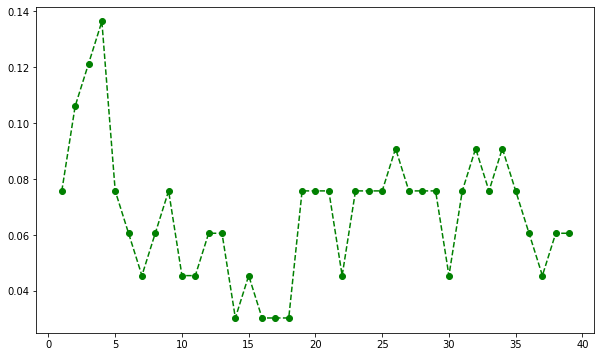

In [41]:
error_rates =[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error_rates.append( np.mean(pred!=y_test) )

opt_k = error_rates.index(min(error_rates)) + 1

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rates, color='green', linestyle='dashed',marker='o')

In [42]:
x_test1.shape

(133, 15)

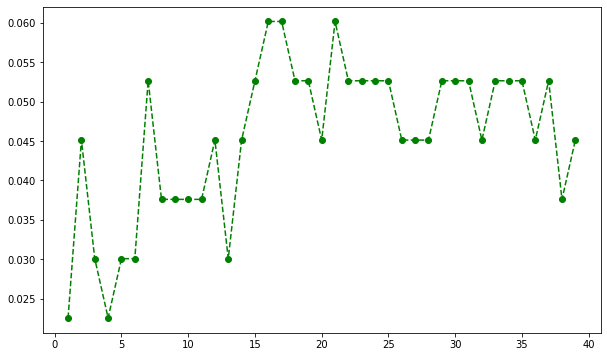

In [43]:
error_rates1 =[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train1, y_train1)
    pred = knn.predict(x_test1)
    error_rates1.append( np.mean(pred!=y_test1) )

opt_k1 = error_rates.index(min(error_rates)) + 1

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rates1, color='green', linestyle='dashed',marker='o')

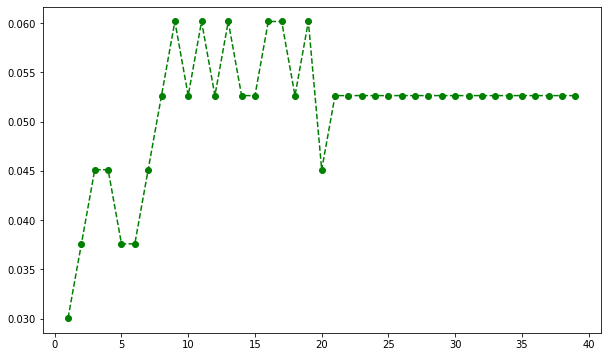

In [44]:
error_rates2 =[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train2, y_train2)
    pred = knn.predict(x_test2)
    error_rates2.append( np.mean(pred!=y_test2) )

opt_k2 = error_rates.index(min(error_rates)) + 1

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rates2, color='green', linestyle='dashed',marker='o')

In [45]:
knn = KNeighborsClassifier(n_neighbors = opt_k)
knn1 = KNeighborsClassifier(n_neighbors = opt_k1)
knn2 = KNeighborsClassifier(n_neighbors = opt_k2)

In [46]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [47]:
knn1.fit(x_train1, y_train1)

KNeighborsClassifier(n_neighbors=14)

In [48]:
knn2.fit(x_train2, y_train2)

KNeighborsClassifier(n_neighbors=14)

In [49]:
pred = knn.predict(x_test)
pred1 = knn1.predict(x_test1)
pred2 = knn2.predict(x_test2)

## Confussion Matrix

- A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

[[29  1]
 [ 1 35]]


/mnt/env/nbenv/49U9NFTCO8B03AAF/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


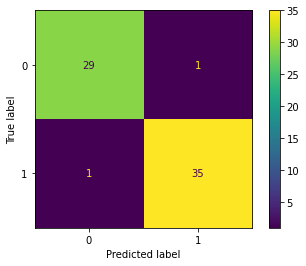

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

print( confusion_matrix(y_test, pred))
plot_confusion_matrix(knn, x_test, y_test)  
plt.show()

[[62  3]
 [ 3 65]]


/mnt/env/nbenv/49U9NFTCO8B03AAF/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


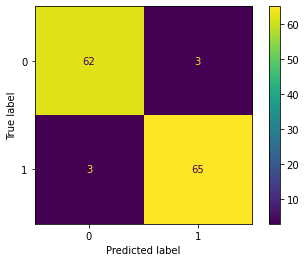

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
print( confusion_matrix(y_test1, pred1))
plot_confusion_matrix(knn1, x_test1, y_test1)  
plt.show()

[[71  6]
 [ 1 55]]


/mnt/env/nbenv/49U9NFTCO8B03AAF/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


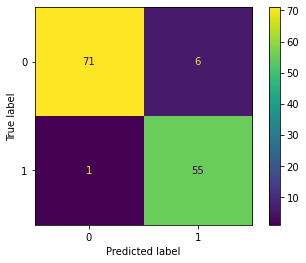

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
print( confusion_matrix(y_test2,pred2))
plot_confusion_matrix(knn2, x_test2, y_test2)  
plt.show()

## F1- Score

- The macro-averaged F1 score (or macro F1 score) is computed by taking the arithmetic mean (aka unweighted mean) of all the per-class F1 scores.

This method treats all classes equally regardless of their support values.
- The weighted-averaged F1 score is calculated by taking the mean of all per-class F1 scores while considering each class’s support.

- Support refers to the number of actual occurrences of the class in the dataset. For example, the support value of 1 in Boat means that there is only one observation with an actual label of Boat.

- Micro averaging computes a global average F1 score by counting the sums of the True Positives (TP), False Negatives (FN), and False Positives (FP).

- We first sum the respective TP, FP, and FN values across all classes and then plug them into the F1 equation to get our micro F1 score.

- The reason is that micro-averaging essentially computes the proportion of correctly classified observations out of all observations. 


In [54]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.97      0.97      0.97        36

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



In [55]:
print(classification_report(y_test1,pred1))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        65
           1       0.96      0.96      0.96        68

    accuracy                           0.95       133
   macro avg       0.95      0.95      0.95       133
weighted avg       0.95      0.95      0.95       133



In [56]:
print(classification_report(y_test2, pred2))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95        77
           1       0.90      0.98      0.94        56

    accuracy                           0.95       133
   macro avg       0.94      0.95      0.95       133
weighted avg       0.95      0.95      0.95       133



## Cross validation for each data set on KNN 

In [57]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

values = [i for i in range(1, 50)]
train_scores, test_scores = list(), list()
for i in values:
# configure the model
    model = KNeighborsClassifier(n_neighbors=i)
    # fit model on the training dataset
    model.fit(x_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(x_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(x_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 1.000, test: 0.924
>2, train: 0.969, test: 0.894
>3, train: 0.973, test: 0.879
>4, train: 0.962, test: 0.864
>5, train: 0.962, test: 0.924
>6, train: 0.946, test: 0.939
>7, train: 0.958, test: 0.955
>8, train: 0.946, test: 0.939
>9, train: 0.935, test: 0.924
>10, train: 0.931, test: 0.955
>11, train: 0.935, test: 0.955
>12, train: 0.935, test: 0.939
>13, train: 0.935, test: 0.939
>14, train: 0.935, test: 0.970
>15, train: 0.935, test: 0.955
>16, train: 0.942, test: 0.970
>17, train: 0.938, test: 0.970
>18, train: 0.931, test: 0.970
>19, train: 0.935, test: 0.924
>20, train: 0.931, test: 0.924
>21, train: 0.938, test: 0.924
>22, train: 0.938, test: 0.955
>23, train: 0.942, test: 0.924
>24, train: 0.935, test: 0.924
>25, train: 0.938, test: 0.924
>26, train: 0.931, test: 0.909
>27, train: 0.935, test: 0.924
>28, train: 0.931, test: 0.924
>29, train: 0.931, test: 0.924
>30, train: 0.931, test: 0.955
>31, train: 0.935, test: 0.924
>32, train: 0.938, test: 0.909
>33, train: 0.935

In [58]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
# define the tree depths to evaluate
values = [i for i in range(1, 50)]
train_scores, test_scores = list(), list()
for i in values:
    model = KNeighborsClassifier(n_neighbors=i)
    # fit model on the training dataset
    model.fit(x_train1, y_train1)
    # evaluate on the train dataset
    train_yhat1 = model.predict(x_train1)
    train_acc1 = accuracy_score(y_train1, train_yhat1)
    train_scores.append(train_acc1)
    # evaluate on the test dataset
    test_yhat1 = model.predict(x_test1)
    test_acc1 = accuracy_score(y_test1, test_yhat1)
    test_scores.append(test_acc1)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc1, test_acc1))

>1, train: 1.000, test: 0.977
>2, train: 0.991, test: 0.955
>3, train: 0.977, test: 0.970
>4, train: 0.979, test: 0.977
>5, train: 0.976, test: 0.970
>6, train: 0.979, test: 0.970
>7, train: 0.972, test: 0.947
>8, train: 0.974, test: 0.962
>9, train: 0.966, test: 0.962
>10, train: 0.974, test: 0.962
>11, train: 0.966, test: 0.962
>12, train: 0.966, test: 0.955
>13, train: 0.962, test: 0.970
>14, train: 0.953, test: 0.955
>15, train: 0.953, test: 0.947
>16, train: 0.947, test: 0.940
>17, train: 0.945, test: 0.940
>18, train: 0.945, test: 0.947
>19, train: 0.942, test: 0.947
>20, train: 0.944, test: 0.955
>21, train: 0.944, test: 0.940
>22, train: 0.944, test: 0.947
>23, train: 0.942, test: 0.947
>24, train: 0.942, test: 0.947
>25, train: 0.938, test: 0.947
>26, train: 0.940, test: 0.955
>27, train: 0.936, test: 0.955
>28, train: 0.944, test: 0.955
>29, train: 0.944, test: 0.947
>30, train: 0.945, test: 0.947
>31, train: 0.945, test: 0.947
>32, train: 0.945, test: 0.955
>33, train: 0.944

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
# define the tree depths to evaluate
values = [i for i in range(1, 50)]
train_scores, test_scores = list(), list()
for i in values:
    model = KNeighborsClassifier(n_neighbors=i)
    # fit model on the training dataset
    model.fit(x_train2, y_train2)
    # evaluate on the train dataset
    train_yhat2 = model.predict(x_train2)
    train_acc2 = accuracy_score(y_train2, train_yhat2)
    train_scores.append(train_acc2)
    # evaluate on the test dataset
    test_yhat2 = model.predict(x_test2)
    test_acc2 = accuracy_score(y_test2, test_yhat2)
    test_scores.append(test_acc2)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc2, test_acc2))

>1, train: 1.000, test: 0.970
>2, train: 0.994, test: 0.962
>3, train: 0.977, test: 0.955
>4, train: 0.979, test: 0.955
>5, train: 0.976, test: 0.962
>6, train: 0.974, test: 0.962
>7, train: 0.972, test: 0.955
>8, train: 0.974, test: 0.947
>9, train: 0.968, test: 0.940
>10, train: 0.972, test: 0.947
>11, train: 0.966, test: 0.940
>12, train: 0.966, test: 0.947
>13, train: 0.964, test: 0.940
>14, train: 0.962, test: 0.947
>15, train: 0.959, test: 0.947
>16, train: 0.962, test: 0.940
>17, train: 0.962, test: 0.940
>18, train: 0.959, test: 0.947
>19, train: 0.960, test: 0.940
>20, train: 0.957, test: 0.955
>21, train: 0.957, test: 0.947
>22, train: 0.953, test: 0.947
>23, train: 0.953, test: 0.947
>24, train: 0.953, test: 0.947
>25, train: 0.953, test: 0.947
>26, train: 0.951, test: 0.947
>27, train: 0.953, test: 0.947
>28, train: 0.951, test: 0.947
>29, train: 0.953, test: 0.947
>30, train: 0.955, test: 0.947
>31, train: 0.953, test: 0.947
>32, train: 0.957, test: 0.947
>33, train: 0.951

## Support Vector Machine

- The kernel parameter can be tuned to take “Linear”,”Poly”,”rbf” etc.

In [60]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [61]:
cls = SVC(C=10).fit(x_train, y_train)
cls1 = SVC(C=10).fit(x_train1, y_train1)
cls2 = SVC(C=10).fit(x_train2, y_train2)
#C is penalty to model

In [62]:
# train and test accuracy
accuracy_train = accuracy_score(y_train, cls.predict(x_train))
accuracy_test = accuracy_score(y_test, cls.predict(x_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 98.08%
Test Accuracy: 95.45%


In [63]:
# train and test accuracy
accuracy_train1 = accuracy_score(y_train1, cls1.predict(x_train1))
accuracy_test1 = accuracy_score(y_test1, cls1.predict(x_test1))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train1*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test1*100))


Train Accuracy: 98.12%
Test Accuracy: 98.50%


In [64]:
# train and test accuracy
accuracy_train2 = accuracy_score(y_train2, cls2.predict(x_train2))
accuracy_test2 = accuracy_score(y_test2, cls2.predict(x_test2))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train2*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test2*100))


Train Accuracy: 98.68%
Test Accuracy: 98.50%


In [65]:
print(classification_report(y_test, cls.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        30
           1       0.92      1.00      0.96        36

    accuracy                           0.95        66
   macro avg       0.96      0.95      0.95        66
weighted avg       0.96      0.95      0.95        66



In [66]:
print(classification_report(y_test1, cls1.predict(x_test1)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        65
           1       0.99      0.99      0.99        68

    accuracy                           0.98       133
   macro avg       0.98      0.98      0.98       133
weighted avg       0.98      0.98      0.98       133



In [67]:
print(classification_report(y_test2, cls2.predict(x_test2)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        77
           1       0.98      0.98      0.98        56

    accuracy                           0.98       133
   macro avg       0.98      0.98      0.98       133
weighted avg       0.98      0.98      0.98       133



## Decision Tree

In [68]:
#we will use decision tree model for better accuracy 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

print("Decision Tree Accuracy:{:.2f}%".format(model.score(x_test, y_test) * 100))

Decision Tree Accuracy:89.39%


In [69]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.89      0.92      0.90        36

    accuracy                           0.89        66
   macro avg       0.89      0.89      0.89        66
weighted avg       0.89      0.89      0.89        66



In [70]:
model1 = DecisionTreeClassifier()
model1.fit(x_train1, y_train1)

print("Decision Tree Accuracy:{:.2f}%".format(model1.score(x_test1, y_test1) * 100))

Decision Tree Accuracy:97.74%


In [71]:
print(classification_report(y_test1, model1.predict(x_test1)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        65
           1       0.96      1.00      0.98        68

    accuracy                           0.98       133
   macro avg       0.98      0.98      0.98       133
weighted avg       0.98      0.98      0.98       133



In [72]:
model2 = DecisionTreeClassifier()
model2.fit(x_train2, y_train2)

print("Decision Tree Accuracy:{:.2f}%".format(model2.score(x_test2, y_test2) * 100))

Decision Tree Accuracy:92.48%


In [73]:
print(classification_report(y_test2, model2.predict(x_test2)))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        77
           1       0.90      0.93      0.91        56

    accuracy                           0.92       133
   macro avg       0.92      0.93      0.92       133
weighted avg       0.93      0.92      0.92       133



## XGBOOST Classifier

In [81]:

# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(x_train, y_train)
# make predictions for test data
y_pred = model.predict(x_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.42%


## Cross validation for the model

In [75]:
# CV model
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model = xgboost.XGBClassifier()
kfold = KFold(n_splits=10)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 96.15% (2.98%)


## Naive Bayes Classifier

In [76]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(x_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 92.42424242424242


## AUC(area under curve) higher the value = high accuracy - ROC(receiver operating characteristics) capability of distinguishing classes


- ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.


- This is the drawback it just measures if the model is able to rank order the classes correctly it does not look at how well the model separates the two classes,

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.994


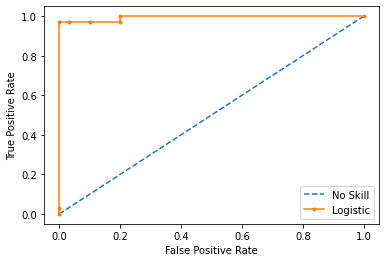

In [78]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression()
model.fit(x_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# The End